In [629]:
## bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy import stats

## visualização

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})

## pandas dataframe

pd.set_option('display.max_columns', None)


In [599]:
## bases
treino = pd.read_csv('Prova Junior/train.csv')

dataExperimentos = pd.read_csv('Prova Junior/data_experimentos.csv')

<h1>Explorando e tratando dados</h1>

In [600]:
treino.sample(5)

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
1547,?,C,R,0,0,?,S,2.0,0,?,?,E,?,?,?,?,?,Y,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,_0.699_,_1320.0_,_4880_,Y,0,?,ideal,exp_188
1640,?,C,K,55,0,?,?,?,0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_0.8_,_900.0_,_0_,?,0,?,mediano,exp_1267
2344,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,_0.8_,_50.0_,_0_,?,0,?,mediano,exp_1353
801,TN,C,A,0,0,?,?,3.0,0,N,?,?,?,?,?,?,B,?,?,?,?,?,?,?,Y,?,?,?,?,?,?,SHEET,_1.6_,_609.9_,_3000_,?,0,?,ideal,exp_426
1757,?,C,A,0,45,?,S,?,0,?,?,D,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_0.699_,_1320.0_,_0_,N,0,?,mediano,exp_1790


In [601]:
dataExperimentos.sample(5)

,exp_id,ano,mes
993,1163,2019,8
482,523,2020,8
1178,814,2019,8
747,358,2020,8
1883,1541,2020,7


In [602]:
print(treino.info())

print('------------')

print(dataExperimentos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   family                  2424 non-null   object
 1   product-type            2424 non-null   object
 2   steel                   2424 non-null   object
 3   carbon                  2424 non-null   int64 
 4   hardness                2424 non-null   int64 
 5   temper_rolling          2424 non-null   object
 6   condition               2424 non-null   object
 7   formability             2424 non-null   object
 8   strength                2424 non-null   int64 
 9   non-ageing              2424 non-null   object
 10  surface-finish          2424 non-null   object
 11  surface-quality         2424 non-null   object
 12  enamelability           2424 non-null   object
 13  bc                      2424 non-null   object
 14  bf                      2424 non-null   object
 15  bt  

<h3>Preparando para o Merge:<br><br>
    * alterando valores nulos <br>
    * tratando a coluna experimento <br>
    * selecionando apenas experimentos realizados em agosto de 2020 </h3>

In [603]:
treino.replace('?', np.nan,inplace=True)

treino['experimento'] = treino['experimento'].str.replace('exp_','', regex=True)

dataExperimentos['exp_id'] = dataExperimentos['exp_id'].astype('str')

dataExperimentos = dataExperimentos[(dataExperimentos['ano']==2020) & (dataExperimentos['mes']==8)]

In [604]:
datasetUnido = dataExperimentos.merge(treino, how='left' ,left_on='exp_id',right_on='experimento')

In [605]:
datasetUnido.sample(5)

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
300,125,2020,8,NaN,C,A,0,45,NaN,S,NaN,0,NaN,NaN,D,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,_0.3_,_610.0_,_762_,NaN,0,NaN,ruim,125
545,293,2020,8,NaN,C,A,0,0,NaN,S,3.0,0,N,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,_1.0_,_610.0_,_762_,NaN,0,NaN,ruim,293
50,744,2020,8,NaN,C,NaN,0,0,NaN,A,2.0,0,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,_0.301_,_610.0_,_762_,Y,0,NaN,ruim,744
243,2028,2020,8,NaN,C,A,0,0,NaN,S,3.0,0,N,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,_0.601_,_610.0_,_762_,NaN,0,NaN,ruim,2028
294,2312,2020,8,NaN,C,M,0,0,NaN,NaN,NaN,350,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COIL,_1.601_,_609.9_,_0_,NaN,0,NaN,mediano,2312


<h3>Tratando colunas:<br><br>
    * thick<br>
    * width	<br>
    * len </h3>

In [606]:
datasetUnido['thick'] = datasetUnido['thick'].str.replace('_','', regex=True).astype(float)

datasetUnido['width'] = datasetUnido['width'].str.replace('_','', regex=True).astype(float)

datasetUnido['len'] = datasetUnido['len'].str.replace('_','', regex=True).astype(float)

In [607]:
datasetUnido.sample(5)

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
788,25,2020,8,NaN,C,W,0,0,NaN,NaN,NaN,310,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,1.599,610.0,762.0,NaN,0,NaN,ideal,25
378,1819,2020,8,NaN,C,A,0,0,NaN,S,2.0,0,NaN,NaN,E,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,3.200,1320.0,4880.0,NaN,0,NaN,ruim,1819
137,1377,2020,8,ZS,C,A,0,50,T,NaN,NaN,0,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COIL,0.600,610.0,0.0,NaN,0,NaN,ideal,1377
520,1682,2020,8,NaN,C,A,0,0,NaN,S,2.0,0,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,COIL,0.699,20.0,0.0,NaN,0,NaN,ruim,1682
306,385,2020,8,NaN,C,A,0,0,NaN,S,2.0,0,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,0.700,1320.1,762.0,NaN,0,NaN,ruim,385


<h3>Retirando colunas que possuam mais de 50% de seus valores nulos.<br> As demais colunas numericas foram preenchidas com a mediana. <h3>

In [608]:
datasetUnido = datasetUnido.loc[:, datasetUnido.isnull().mean() < .5]
datasetUnido = datasetUnido.fillna(datasetUnido.median())

<h1>análises gráficas</h1>

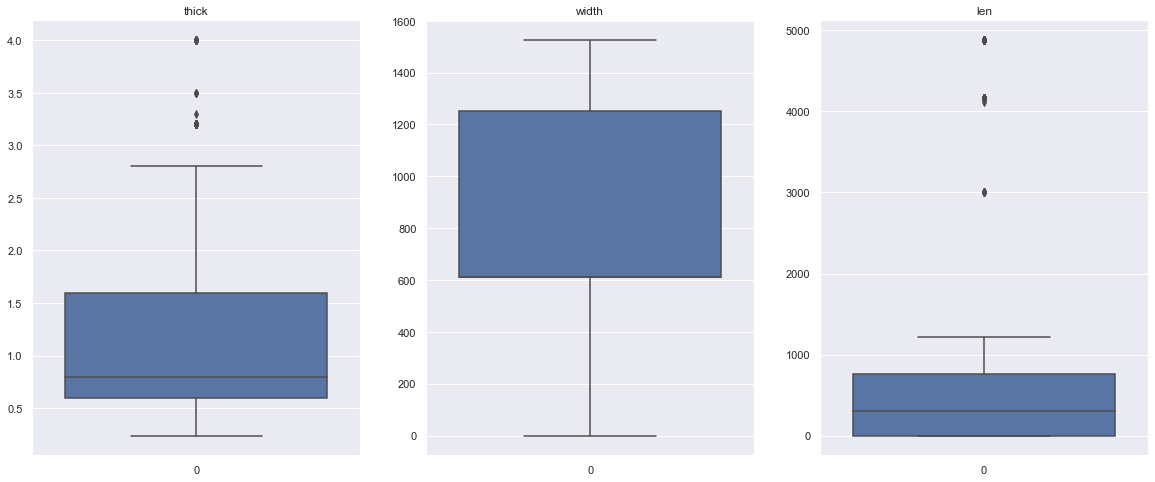

In [630]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

sns.boxplot(data = datasetUnido['thick'], ax=ax1).set_title('thick')

sns.boxplot(data = datasetUnido['width'],ax=ax2).set_title('width')

sns.boxplot(data = datasetUnido['len'],ax=ax3).set_title('len')

plt.show()

A coluna thick e len possuem alguns valores considerados outliers.<br>

<AxesSubplot:title={'center':'tipos de produtos'}>

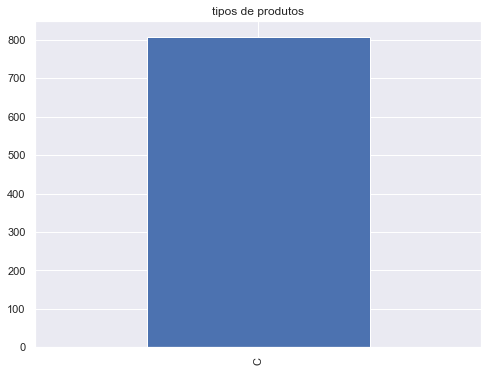

In [631]:
datasetUnido['product-type'].value_counts().plot(kind='bar',title='tipos de produtos')

<AxesSubplot:title={'center':'Formas'}>

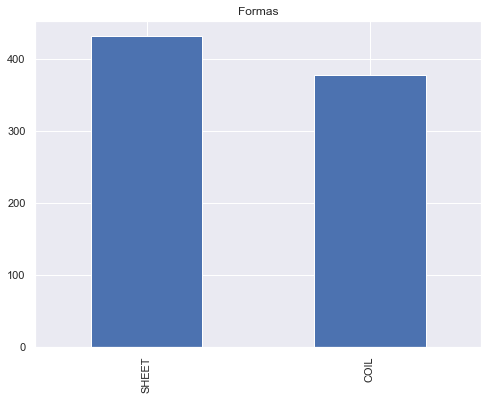

In [632]:
datasetUnido['shape'].value_counts().plot(kind='bar',title='Formas')

<AxesSubplot:title={'center':'Recozimento'}>

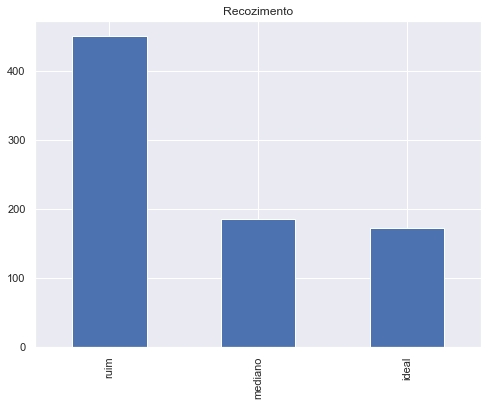

In [633]:
datasetUnido['recozimento'].value_counts().plot(kind='bar',title='Recozimento')

<AxesSubplot:title={'center':'Qualidade da superfície'}>

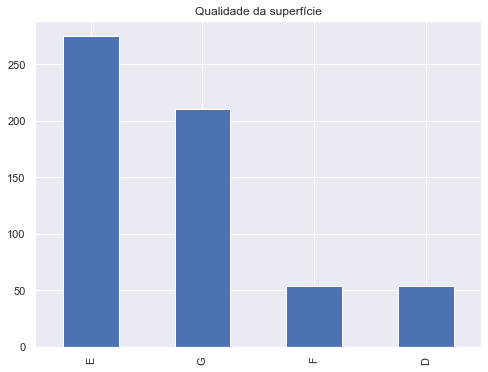

In [634]:
datasetUnido['surface-quality'].value_counts().plot(kind='bar',title='Qualidade da superfície')

1 - A base utilizada na prova possui apenas o tipo de produto C.<br>
2 - Apenas 2 formas são utilizadas Sheet e Coil<br>
3 - Mais de 50% dos recozimentos foram considerados ruins<br>
4 - A maior parte possui uma qualidade de superfície E ou G <br>


Text(0.5, 1.0, 'Gráfico de correlação')

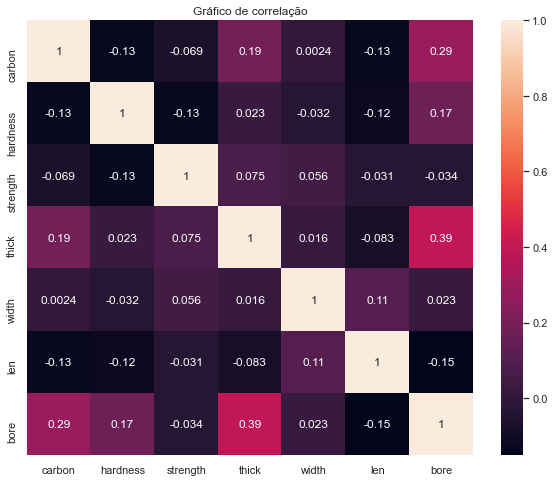

In [614]:
ax = plt.axes()

sns.heatmap(datasetUnido.iloc[:,-15:].corr(), annot = True)

ax.set_title('Gráfico de correlação')

As variáveis com maior correlação são :<br>
1 - tick x bore<br>
2 - carbon x bore<br>
3 - tick x carbon<br>
4 - hardness x bore<br>

Não existe nenhuma correlação perfeita entre as variáveis, por isso nenhuma coluna será retirada

<h1>Treinando modelo</h1>

<h3>Para o treino foi escolhida o Random Forest pois :<br><br>
    1 - é menos sensivel a outliers, e no dataset existem alguns<br>
    2 - fácil visualização da importância de cada feature<br>
    3 - boa performance
    
</h3>

In [615]:
## definindo X e Y
x = pd.get_dummies(datasetUnido.drop(['recozimento','exp_id','experimento'],axis=1))

y = datasetUnido['recozimento']

In [616]:
# Buscando melhores parametros
# por estar desbalanceada foram utilizados class_weight : 'balanced','balanced_subsample' para o teste
param_grid = {
    
    'bootstrap': [True],
    
    'max_depth': [80, 90, 100, 110],
    
    'max_features': [2, 3, 4, 5],
    
    'class_weight':['balanced','balanced_subsample'],
    
    'min_samples_leaf': [3, 4, 5],
    
    'min_samples_split': [8, 10, 12],
    
    'n_estimators': [100, 200, 300, 1000, 2000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf,
                           
                           param_grid = param_grid,
                           
                           cv = 3,
                           
                           n_jobs = -1,
                           
                           verbose = 2)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 16.8min finished


{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [623]:
## treinando modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators = 100,
                            
                            bootstrap = True,
                            
                            max_depth = 100,
                            
                            max_features = 3,
                            
                            min_samples_leaf = 3,
                            
                            min_samples_split = 8,
                            
                            class_weight = 'balanced_subsample',
                            
                            random_state = 42,
                           )

rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=100,
                       max_features=3, min_samples_leaf=3, min_samples_split=8,
                       random_state=42)

In [624]:
## predizendo x_test
y_pred_rf = rf.predict(x_test)

## importancia de cada variável
print(rf.feature_importances_)

print(x.columns)

[0.         0.         0.05850284 0.06259465 0.03419273 0.0838981
 0.06391217 0.04763727 0.05347864 0.         0.02803659 0.03702251
 0.00446378 0.02534556 0.00225401 0.00225656 0.00278174 0.01358884
 0.18560676 0.09153815 0.01013404 0.06883974 0.01648733 0.00136148
 0.01849407 0.02653936 0.00522429 0.02531306 0.01759356 0.01290216]
Index(['ano', 'mes', 'carbon', 'hardness', 'strength', 'thick', 'width', 'len',
       'bore', 'product-type_C', 'steel_A', 'steel_K', 'steel_M', 'steel_R',
       'steel_S', 'steel_V', 'steel_W', 'condition_A', 'condition_S',
       'formability_2.0', 'formability_1.0', 'formability_2.0',
       'formability_3.0', 'formability_5.0', 'surface-quality_D',
       'surface-quality_E', 'surface-quality_F', 'surface-quality_G',
       'shape_COIL', 'shape_SHEET'],
      dtype='object')


<h3>Como ficou o modelo aplicado ao teste?</h3>

In [625]:
print(confusion_matrix(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

[[ 56   0   0]
 [ 10  24  20]
 [  1   6 126]]
              precision    recall  f1-score   support

       ideal       0.84      1.00      0.91        56
     mediano       0.80      0.44      0.57        54
        ruim       0.86      0.95      0.90       133

    accuracy                           0.85       243
   macro avg       0.83      0.80      0.80       243
weighted avg       0.84      0.85      0.83       243



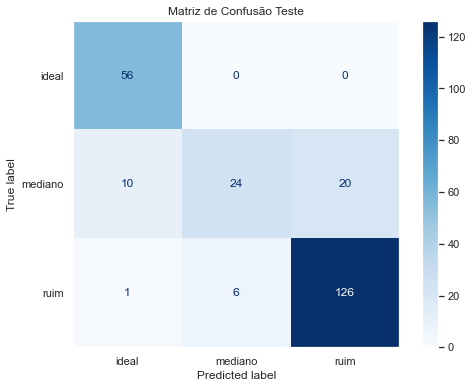

In [637]:
## plotando Matriz de confusão do teste
f, ax = plt.subplots(1,1,figsize=(8,6))

plt.grid(False)

plot_confusion_matrix(rf,x_test,y_test,ax=ax,cmap=plt.cm.Blues,values_format='.4g')

ax.set_title('Matriz de Confusão Teste')

plt.show()

<h3>Como ficou o modelo aplicado ao treino?</h3>

In [627]:
# matrix de confusão com precisão, recall, f1-scope e support do treino
y_pred_train_rf = rf.predict(x_train)

print(confusion_matrix(y_train, y_pred_train_rf))

print(classification_report(y_train, y_pred_train_rf))

[[115   0   1]
 [ 19  65  48]
 [  4   3 310]]
              precision    recall  f1-score   support

       ideal       0.83      0.99      0.91       116
     mediano       0.96      0.49      0.65       132
        ruim       0.86      0.98      0.92       317

    accuracy                           0.87       565
   macro avg       0.88      0.82      0.82       565
weighted avg       0.88      0.87      0.85       565



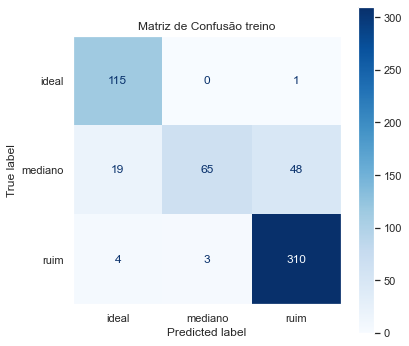

In [638]:
## plotando Matriz de confusão do treino
f, ax = plt.subplots(1,1,figsize=(6,6))

plt.grid(False)

plot_confusion_matrix(rf,x_train,y_train,ax=ax,cmap=plt.cm.Blues,values_format='d')

ax.set_title('Matriz de Confusão treino')

plt.show()

<h2>O resultado demonstra que enquanto o modelo tem facilidade para acertar os recozimentos ideal e ruim, ele tem uma maior dificuldade de acertar recozimentos medianos, tendendo em classificar muitos para o lado do recozimento ruim.</h2>